In [1]:
import os
import pickle
import json
import matplotlib.pyplot as plt
from scipy import stats

from matplotlib import rcParams
import numpy as np
import matplotlib.ticker as ticker
import seaborn as sns
from scipy.stats import pearsonr

rcParams["font.family"] = "serif"
rcParams["grid.linestyle"] = ':'
rcParams["xtick.direction"] = 'in'
rcParams["ytick.direction"] = 'in'
rcParams["legend.fontsize"] = 11
rcParams["axes.labelsize"] = 18
rcParams["axes.titlesize"] = 20
rcParams["xtick.labelsize"] = 15
rcParams["ytick.labelsize"] = 15

In [2]:
plot_file_template = './plots/log-linear-all-datasets-plot-counttype_{}_prompttype_{}_ptdataset_{}_model_{}_t2i.pkl'

In [3]:
prompt_types = [
    'exp_aesthetics',
    'exp_clip',
    'human_aesthetics',
    'human_align',
    'max_clip',
    'max_aesthetics',
]

pt_map = {
    'exp_aesthetics': 'Avg. Aesthetic Score',
    'exp_clip': 'Avg. CLIP Score',
    'human_aesthetics': 'Human Aesthetic Score',
    'human_align': 'Human Alignment Score',
    'max_clip': 'Max CLIP Score',
    'max_aesthetics': 'Max Aesthetic Score',
}

/tmp/ipykernel_2225608/3963163080.py:98: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 7*10**7)
/tmp/ipykernel_2225608/3963163080.py:129: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 7*10**7)
/tmp/ipykernel_2225608/3963163080.py:162: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 7*10**7)
/tmp/ipykernel_2225608/3963163080.py:195: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 7*10**7)
/tmp/ipykernel_2225608/3963163080.py:228: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 7*10**7)
/tmp/ipykernel_2225608/3963163080.py:262: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 7*10**7)
/tmp/ipykernel_2225608/3963163080.py:294: UserWarning: Attempt to set non-positive xlim on a log-scaled axi

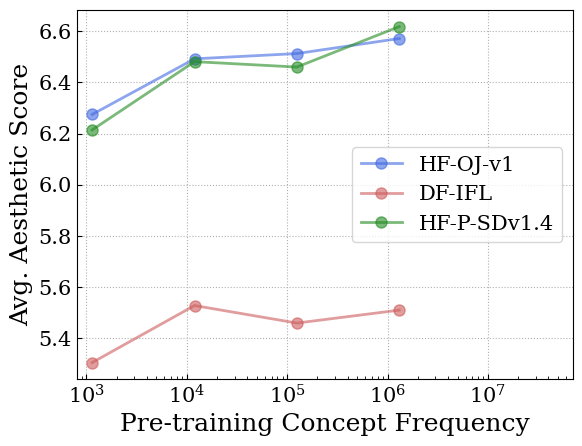

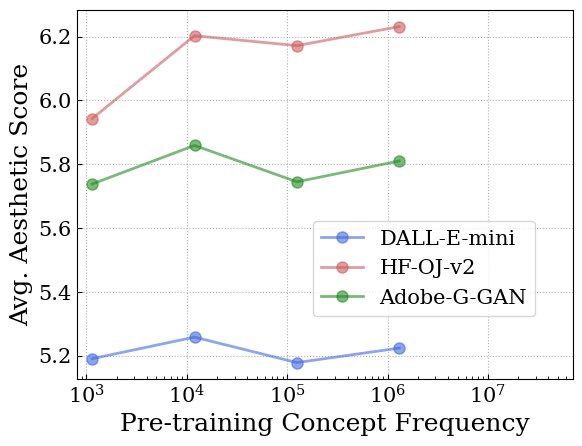

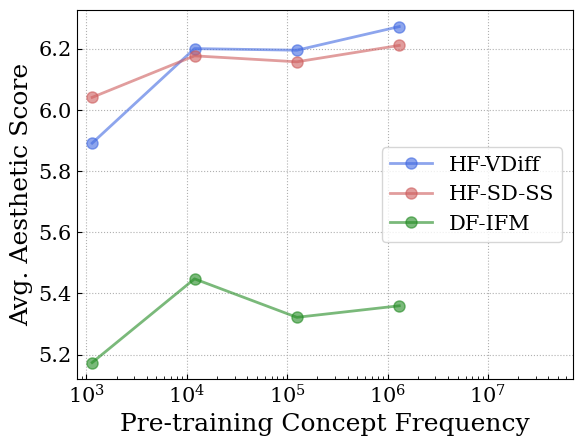

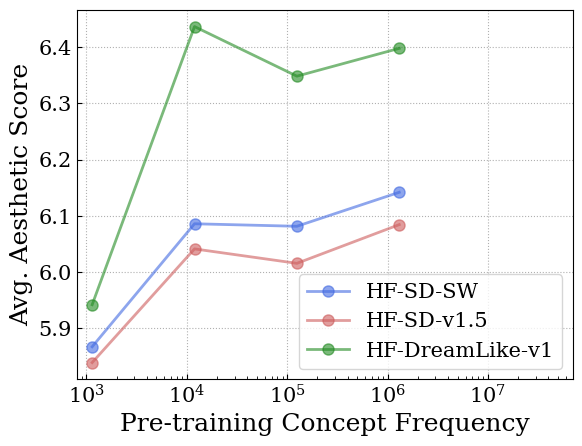

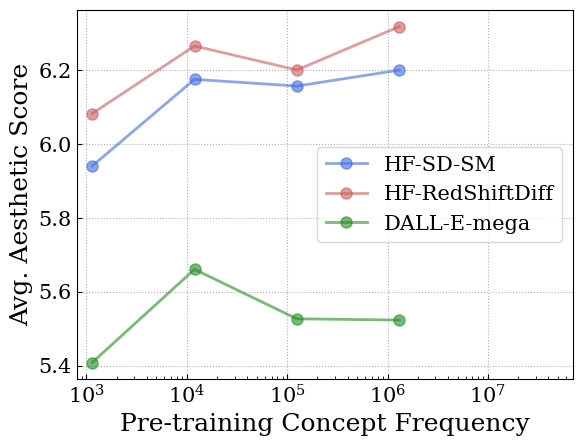

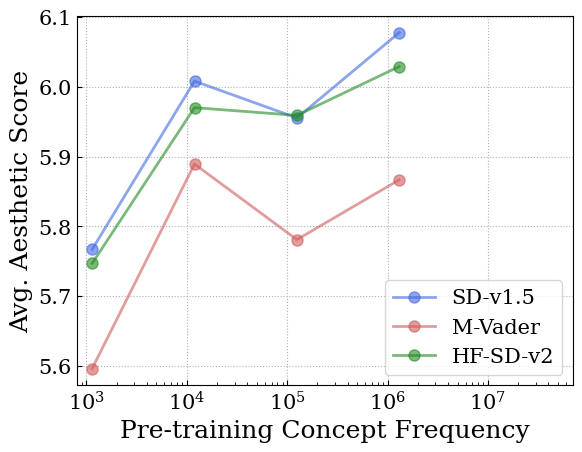

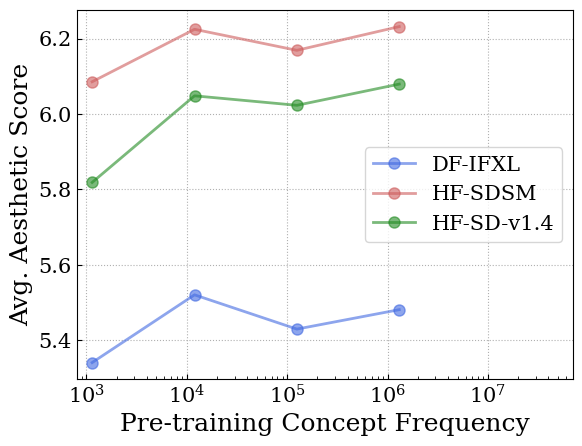

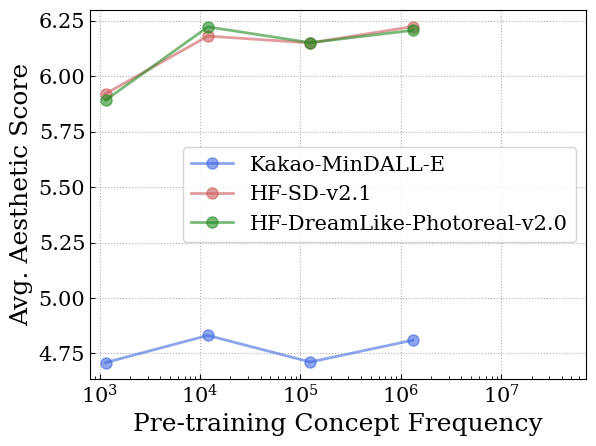

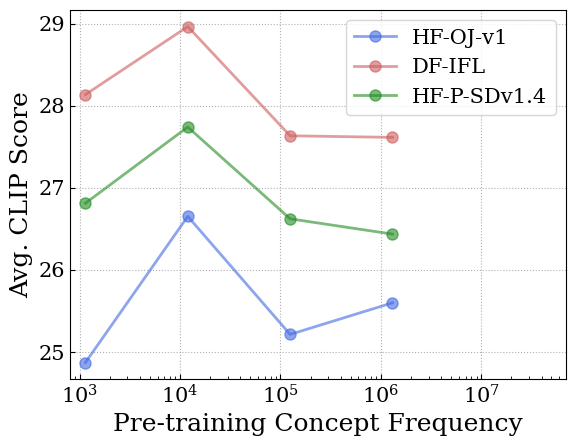

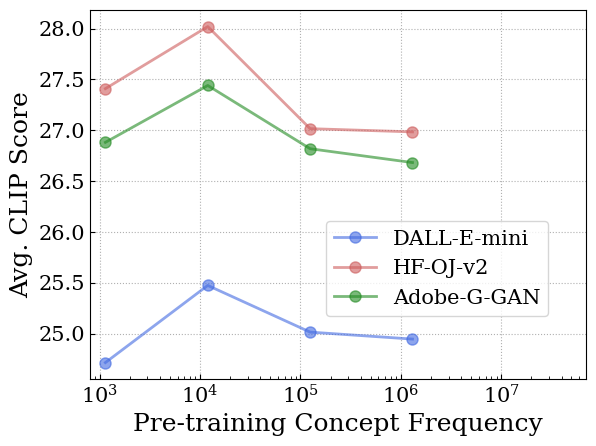

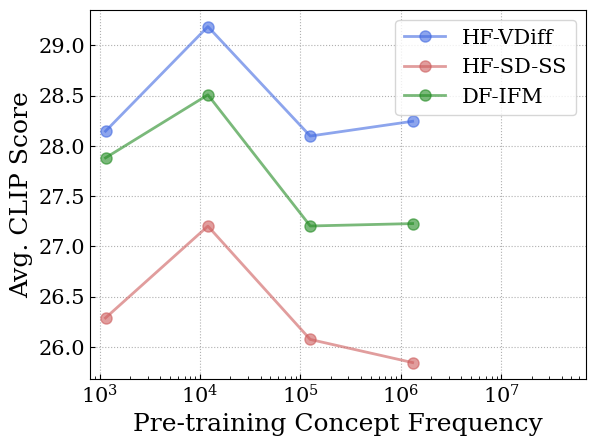

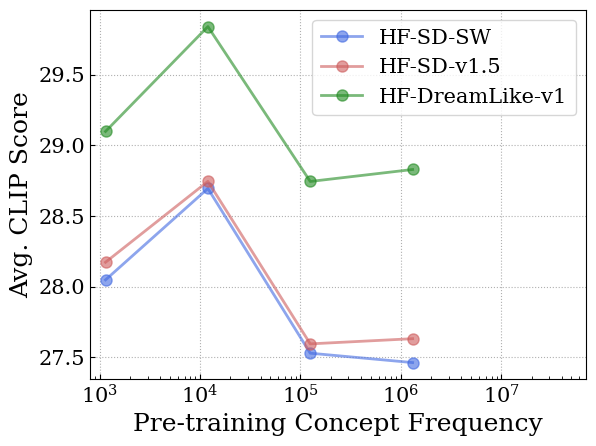

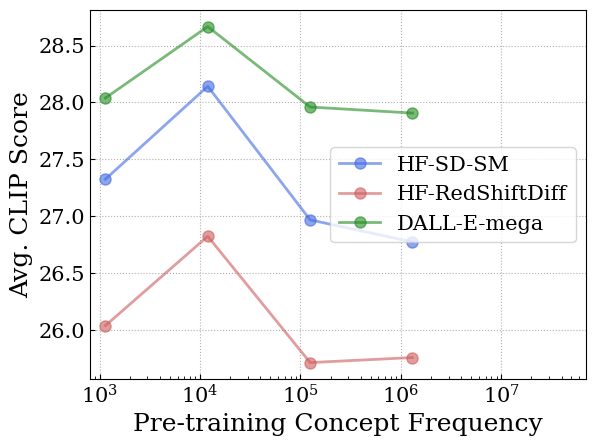

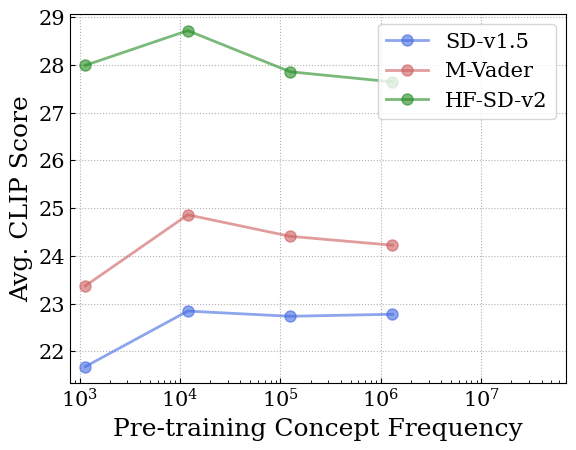

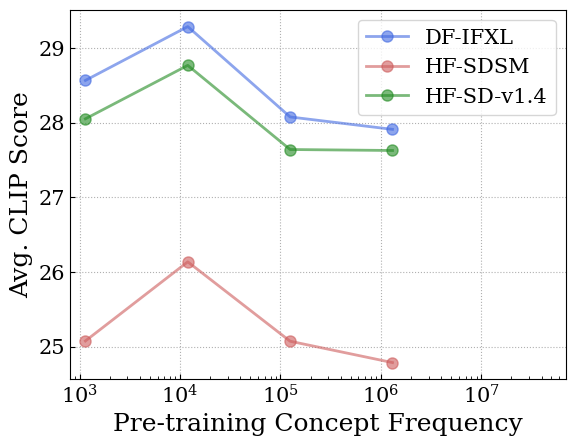

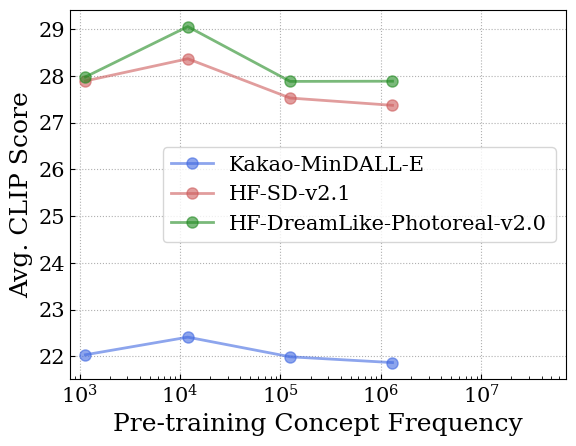

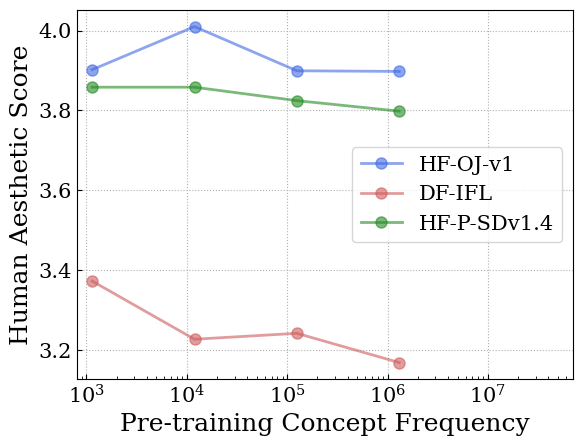

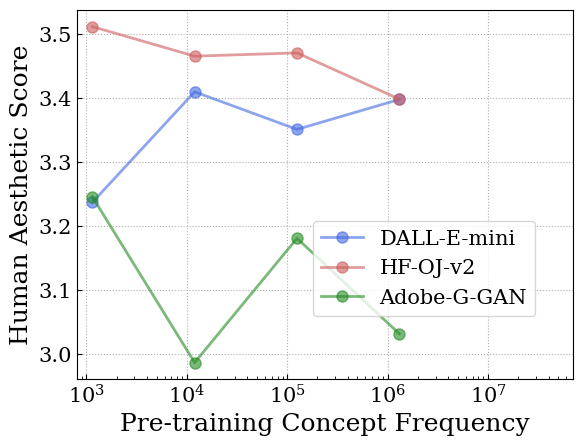

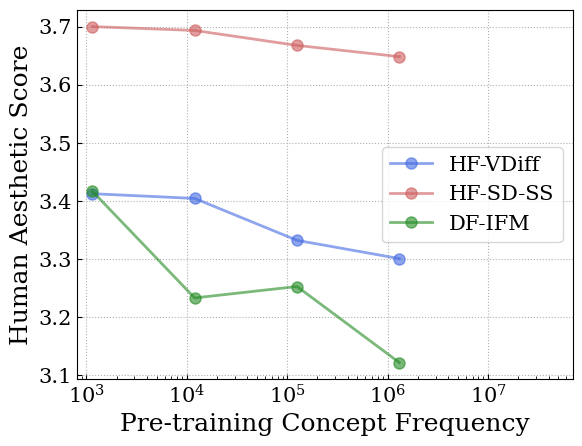

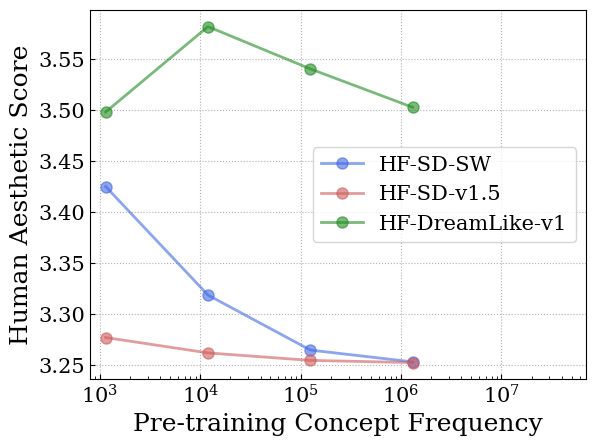

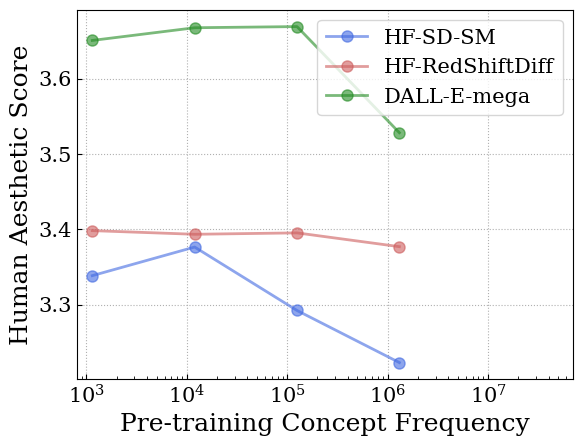

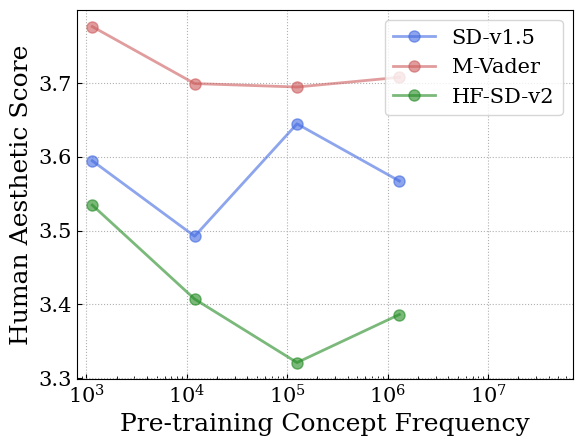

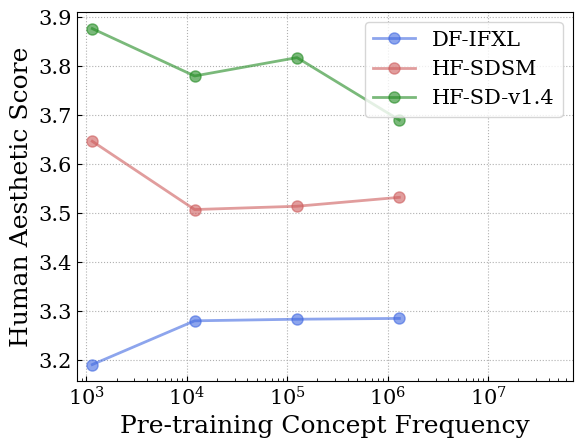

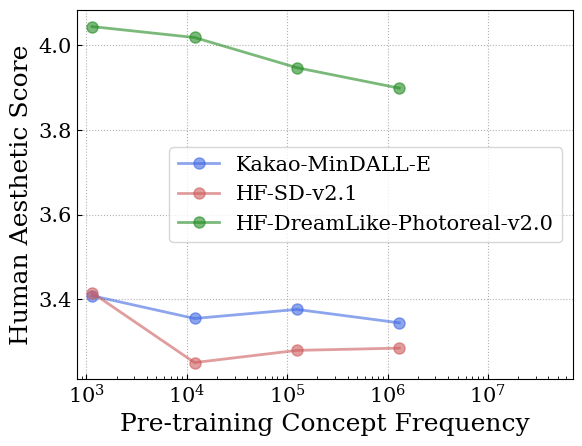

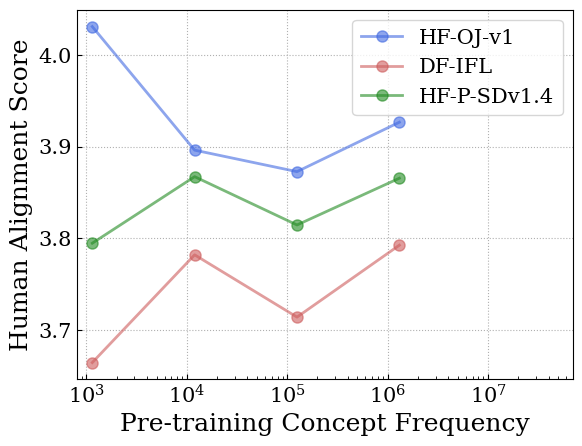

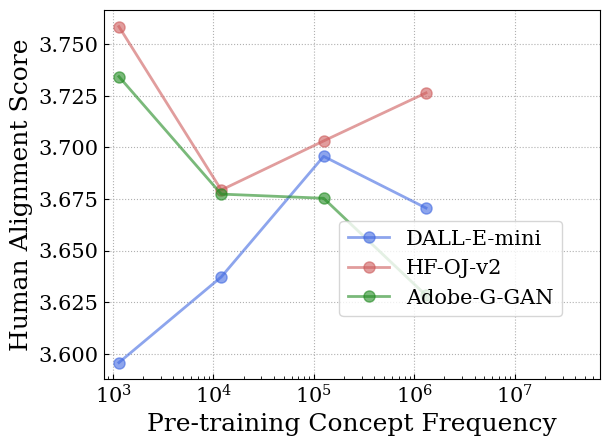

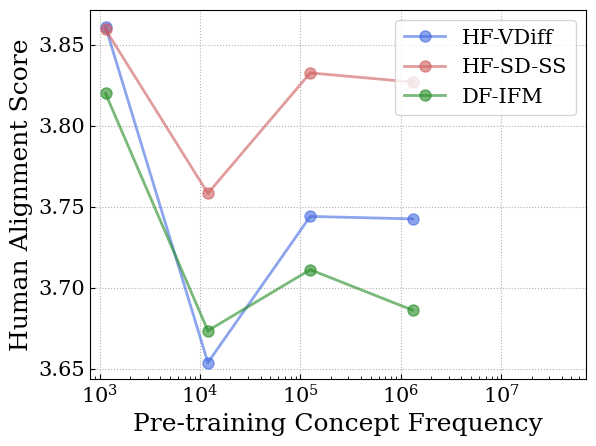

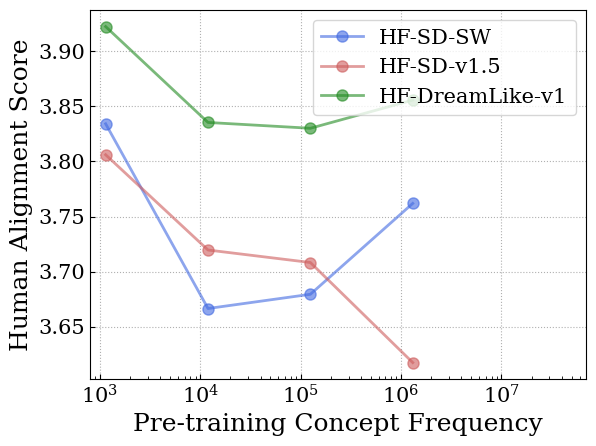

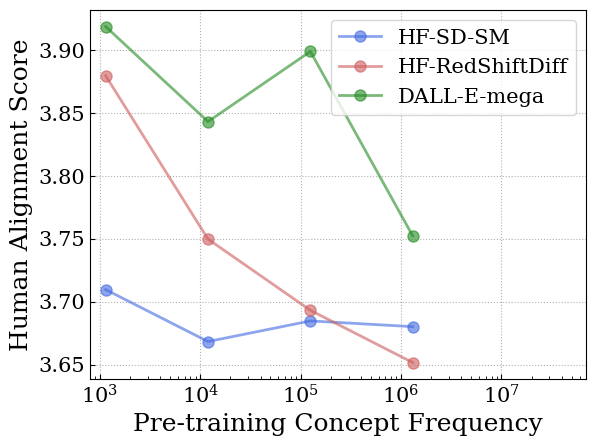

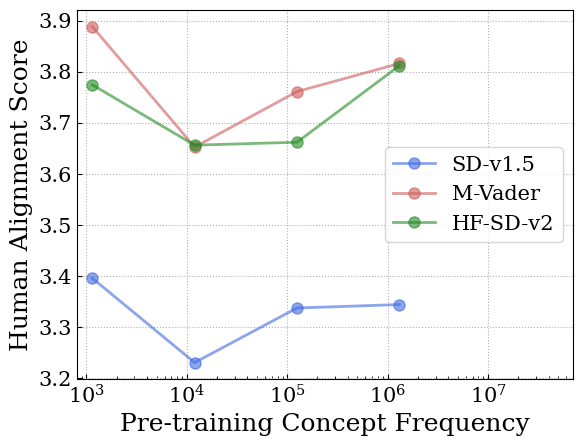

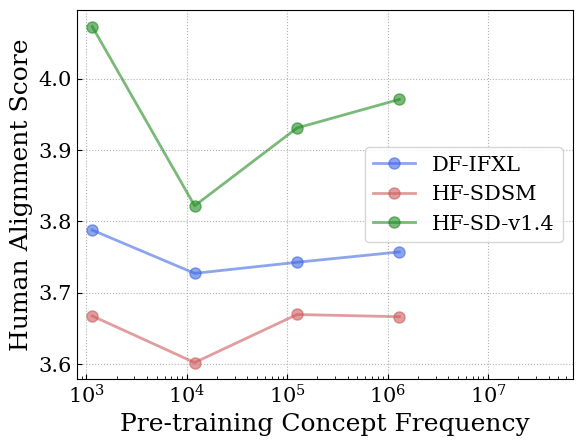

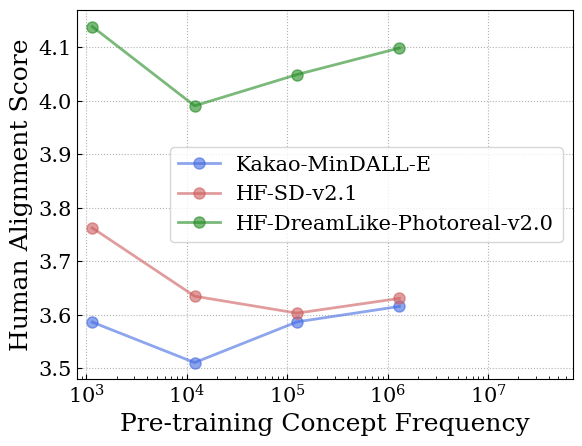

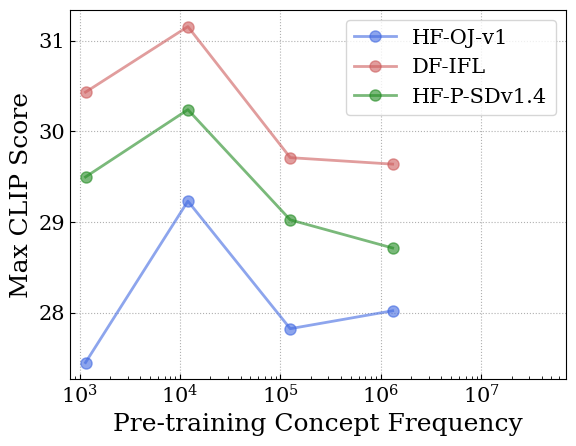

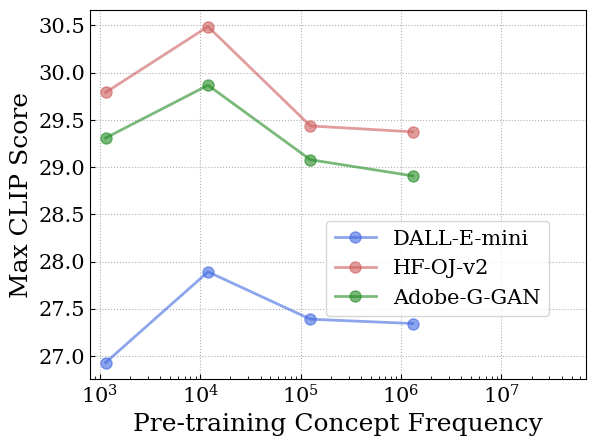

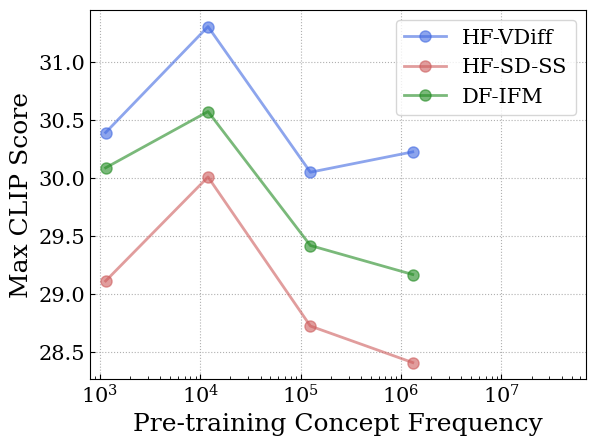

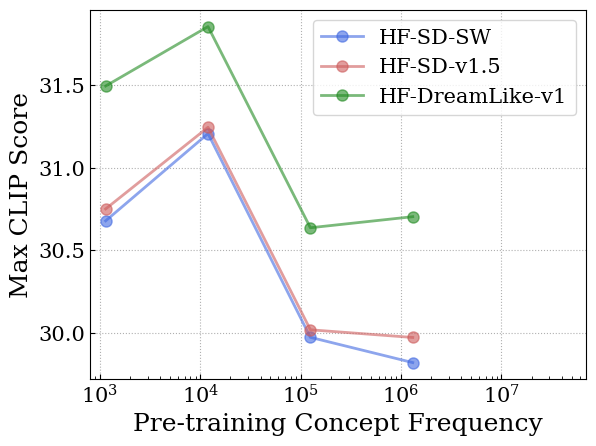

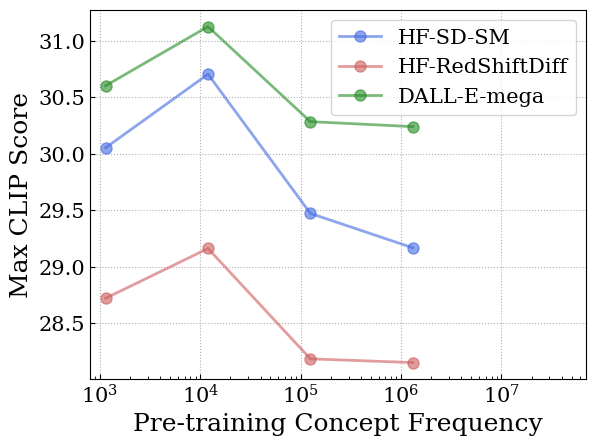

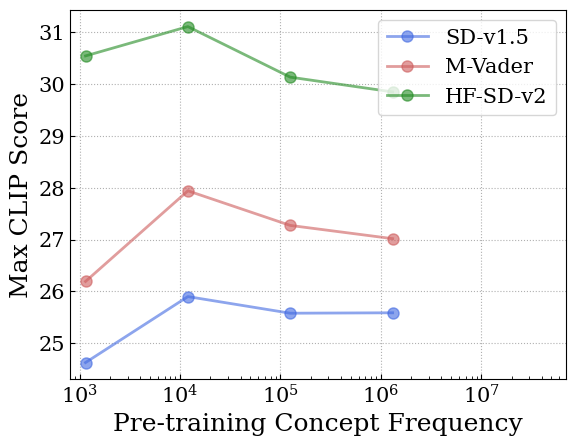

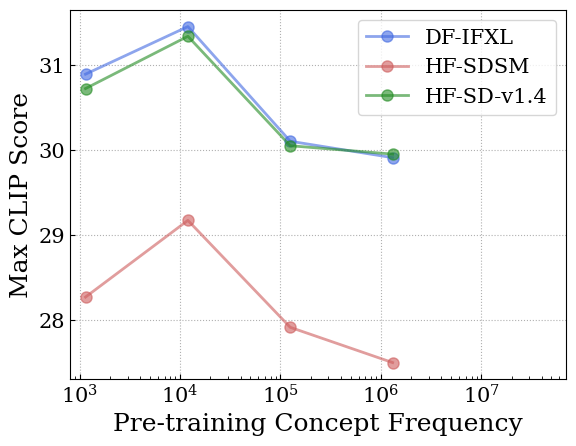

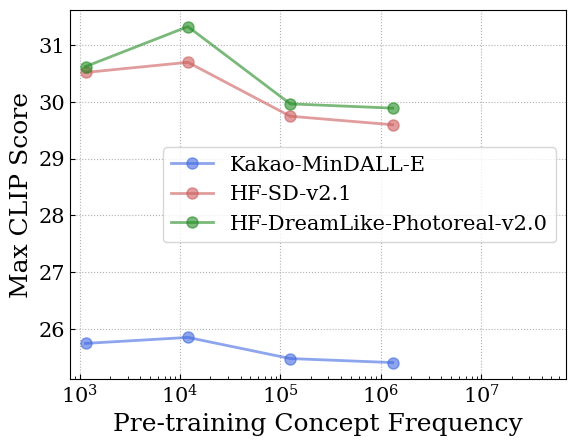

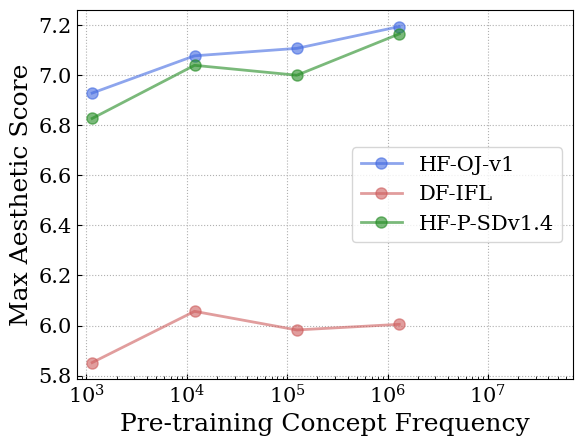

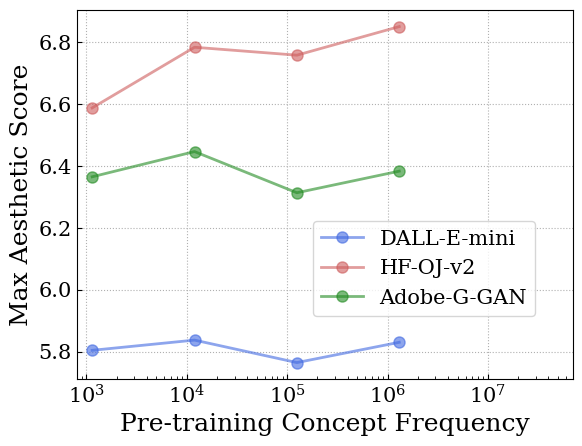

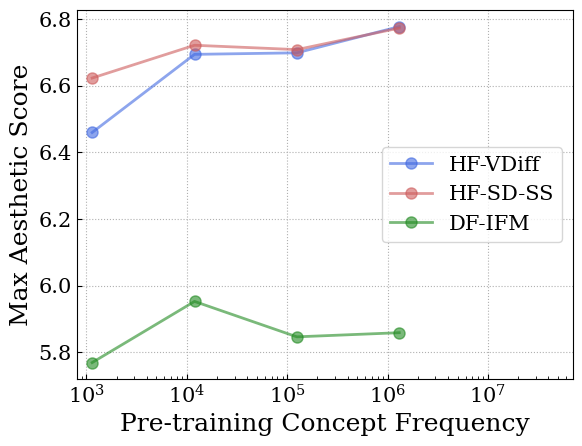

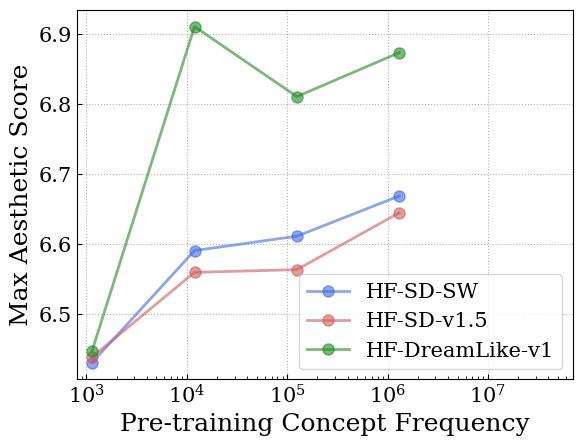

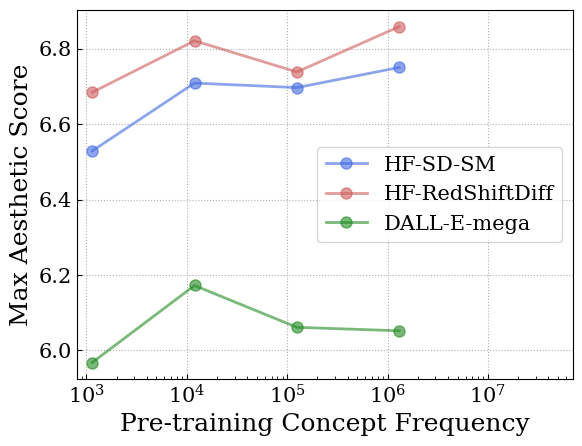

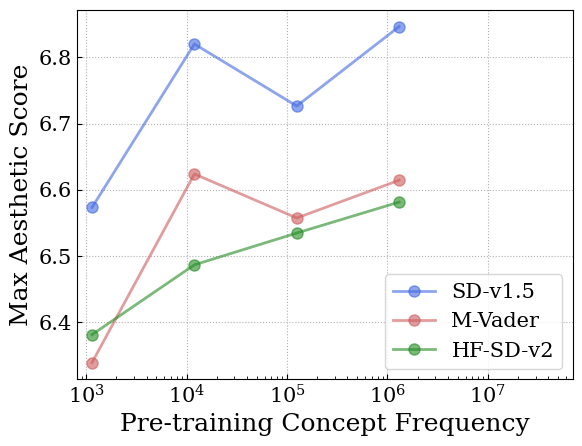

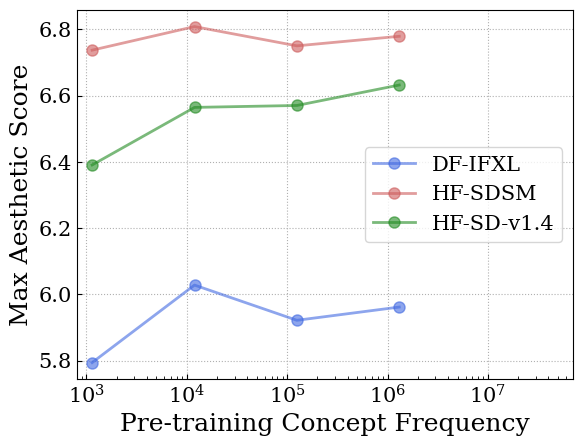

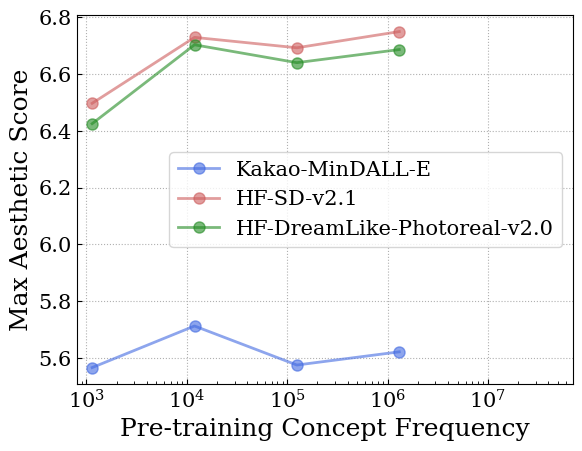

In [4]:
for pt in prompt_types:
    
    prompt_type = pt
    image_search_type = 'rampp0.7'
    text_search_type = 'lemmatized'
    integrated_search_type = 'integrated_rampp0.7'
    pt_dataset = 'laion_aesthetics'
    
    # image-search
    image_res_array = {}
    
    combinations = [
        'huggingface_openjourney-v1-0',
        'DeepFloyd_IF-I-L-v1.0',
        'huggingface_promptist-stable-diffusion-v1-4',
        'craiyon_dalle-mini',
        'huggingface_openjourney-v2-0',
        'adobe_giga-gan',
        'huggingface_vintedois-diffusion-v0-1',
        'huggingface_stable-diffusion-safe-strong',
        'DeepFloyd_IF-I-M-v1.0',
        'huggingface_stable-diffusion-safe-weak',
        'huggingface_stable-diffusion-v1-5',
        'huggingface_dreamlike-diffusion-v1-0',
        'huggingface_stable-diffusion-safe-medium',
        'huggingface_redshift-diffusion',
        'craiyon_dalle-mega',
        'lexica_search-stable-diffusion-1.5',
        'AlephAlpha_m-vader',
        'huggingface_stable-diffusion-v2-base',
        'DeepFloyd_IF-I-XL-v1.0',
        'huggingface_stable-diffusion-safe-max',
        'huggingface_stable-diffusion-v1-4',
        'kakaobrain_mindall-e',
        'huggingface_stable-diffusion-v2-1-base',
        'huggingface_dreamlike-photoreal-v2-0',
    ]
    
    shorts = {
        'huggingface_openjourney-v1-0': 'HF-OJ-v1',
        'DeepFloyd_IF-I-L-v1.0': 'DF-IFL',
        'huggingface_promptist-stable-diffusion-v1-4': 'HF-P-SDv1.4',
        'craiyon_dalle-mini': 'DALL-E-mini',
        'huggingface_openjourney-v2-0': 'HF-OJ-v2',
        'adobe_giga-gan': 'Adobe-G-GAN',
        'huggingface_vintedois-diffusion-v0-1': 'HF-VDiff',
        'huggingface_stable-diffusion-safe-strong': 'HF-SD-SS',
        'DeepFloyd_IF-I-M-v1.0': 'DF-IFM',
        'huggingface_stable-diffusion-safe-weak': 'HF-SD-SW',
        'huggingface_stable-diffusion-v1-5': 'HF-SD-v1.5',
        'huggingface_dreamlike-diffusion-v1-0': 'HF-DreamLike-v1',
        'huggingface_stable-diffusion-safe-medium': 'HF-SD-SM',
        'huggingface_redshift-diffusion': 'HF-RedShiftDiff',
        'craiyon_dalle-mega': 'DALL-E-mega',
        'lexica_search-stable-diffusion-1.5': 'SD-v1.5',
        'AlephAlpha_m-vader': 'M-Vader',
        'huggingface_stable-diffusion-v2-base': 'HF-SD-v2',
        'DeepFloyd_IF-I-XL-v1.0': 'DF-IFXL',
        'huggingface_stable-diffusion-safe-max': 'HF-SDSM',
        'huggingface_stable-diffusion-v1-4': 'HF-SD-v1.4',
        'kakaobrain_mindall-e': 'Kakao-MinDALL-E',
        'huggingface_stable-diffusion-v2-1-base': 'HF-SD-v2.1',
        'huggingface_dreamlike-photoreal-v2-0': 'HF-DreamLike-Photoreal-v2.0',
    }
    
    for comb in combinations:
        image_res_array[comb] = pickle.load(open(plot_file_template.format(integrated_search_type, prompt_type, pt_dataset, comb), 'rb'))
    

    plt.figure(figsize=(6.4, 4.8))
    
    ranges = (0, 3)
    
    colors = ['royalblue', 'indianred', 'forestgreen']
    
    for index in range(ranges[0], ranges[1]):
    
        _mod = combinations[index]
        
        _corr, sig = pearsonr(np.log(image_res_array[_mod]['exp_bins'][-4:]), image_res_array[_mod]['cum_means'][-4:])
        _add = '**' if sig<0.05 else ''
    
        plt.plot(image_res_array[_mod]['exp_bins'][-4:], image_res_array[_mod]['cum_means'][-4:], marker='o', linestyle='solid', label='{}'.format(shorts[_mod]), alpha=0.6, markersize=8, linewidth=2, c=colors[index%3])
    
    plt.xlabel('Pre-training Concept Frequency')
    plt.ylabel(pt_map[prompt_type])
    plt.xscale('log')
    plt.xlim(0, 7*10**7)
    plt.legend(loc='best', fontsize=15)
    
    plt.grid()
    plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=12))
    plt.gca().xaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=np.arange(1.0, 10.0) * 0.1, numticks=12))
    plt.savefig('./plots/eccv-paper-laion400m-t2i-log-linear-plot-integrated-queried-search_1-{}.png'.format(prompt_type), dpi=500, bbox_inches='tight', transparent=True)


    plt.figure(figsize=(6.4, 4.8))
    
    ranges = (3, 6)
    
    colors = ['royalblue', 'indianred', 'forestgreen']
    
    for index in range(ranges[0], ranges[1]):
    
        _mod = combinations[index]
        
        _corr, sig = pearsonr(np.log(image_res_array[_mod]['exp_bins'][-4:]), image_res_array[_mod]['cum_means'][-4:])
        _add = '**' if sig<0.05 else ''
    
        plt.plot(image_res_array[_mod]['exp_bins'][-4:], image_res_array[_mod]['cum_means'][-4:], marker='o', linestyle='solid', label='{}'.format(shorts[_mod]), alpha=0.6, markersize=8, linewidth=2, c=colors[index%3])
    
    plt.xlabel('Pre-training Concept Frequency')
    plt.ylabel(pt_map[prompt_type])
    plt.xscale('log')
    plt.xlim(0, 7*10**7)
    plt.legend(loc='center', bbox_to_anchor=(0.7, 0.3), fontsize=15)
    
    plt.grid()
    plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=12))
    plt.gca().xaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=np.arange(1.0, 10.0) * 0.1, numticks=12))
    
    plt.savefig('./plots/eccv-paper-laion400m-t2i-log-linear-plot-integrated-queried-search_2-{}.png'.format(prompt_type), dpi=500, bbox_inches='tight', transparent=True)



    plt.figure(figsize=(6.4, 4.8))
    
    ranges = (6, 9)
    
    colors = ['royalblue', 'indianred', 'forestgreen']
    
    for index in range(ranges[0], ranges[1]):
    
        _mod = combinations[index]
        
        _corr, sig = pearsonr(np.log(image_res_array[_mod]['exp_bins'][-4:]), image_res_array[_mod]['cum_means'][-4:])
        _add = '**' if sig<0.05 else ''
    
        plt.plot(image_res_array[_mod]['exp_bins'][-4:], image_res_array[_mod]['cum_means'][-4:], marker='o', linestyle='solid', label='{}'.format(shorts[_mod]), alpha=0.6, markersize=8, linewidth=2, c=colors[index%3])
    
    plt.xlabel('Pre-training Concept Frequency')
    plt.ylabel(pt_map[prompt_type])
    plt.xscale('log')
    plt.xlim(0, 7*10**7)
    plt.legend(loc='best', fontsize=15)
    
    plt.grid()
    plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=12))
    plt.gca().xaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=np.arange(1.0, 10.0) * 0.1, numticks=12))
    
    plt.savefig('./plots/eccv-paper-laion400m-t2i-log-linear-plot-integrated-queried-search_3-{}.png'.format(prompt_type), dpi=500, bbox_inches='tight', transparent=True)
    
    

    plt.figure(figsize=(6.4, 4.8))
    
    ranges = (9, 12)
    
    colors = ['royalblue', 'indianred', 'forestgreen']
    
    for index in range(ranges[0], ranges[1]):
    
        _mod = combinations[index]
        
        _corr, sig = pearsonr(np.log(image_res_array[_mod]['exp_bins'][-4:]), image_res_array[_mod]['cum_means'][-4:])
        _add = '**' if sig<0.05 else ''
    
        plt.plot(image_res_array[_mod]['exp_bins'][-4:], image_res_array[_mod]['cum_means'][-4:], marker='o', linestyle='solid', label='{}'.format(shorts[_mod]), alpha=0.6, markersize=8, linewidth=2, c=colors[index%3])
    
    plt.xlabel('Pre-training Concept Frequency')
    plt.ylabel(pt_map[prompt_type])
    plt.xscale('log')
    plt.xlim(0, 7*10**7)
    plt.legend(loc='best', fontsize=15)
    
    plt.grid()
    plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=12))
    plt.gca().xaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=np.arange(1.0, 10.0) * 0.1, numticks=12))
    
    plt.savefig('./plots/eccv-paper-laion400m-t2i-log-linear-plot-integrated-queried-search_4-{}.png'.format(prompt_type), dpi=500, bbox_inches='tight', transparent=True)



    plt.figure(figsize=(6.4, 4.8))
    
    ranges = (12, 15)
    
    colors = ['royalblue', 'indianred', 'forestgreen']
    
    for index in range(ranges[0], ranges[1]):
    
        _mod = combinations[index]
        
        _corr, sig = pearsonr(np.log(image_res_array[_mod]['exp_bins'][-4:]), image_res_array[_mod]['cum_means'][-4:])
        _add = '**' if sig<0.05 else ''
    
        plt.plot(image_res_array[_mod]['exp_bins'][-4:], image_res_array[_mod]['cum_means'][-4:], marker='o', linestyle='solid', label='{}'.format(shorts[_mod]), alpha=0.6, markersize=8, linewidth=2, c=colors[index%3])
    
    plt.xlabel('Pre-training Concept Frequency')
    plt.ylabel(pt_map[prompt_type])
    plt.xscale('log')
    plt.xlim(0, 7*10**7)
    plt.legend(loc='best', fontsize=15)
    
    plt.grid()
    plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=12))
    plt.gca().xaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=np.arange(1.0, 10.0) * 0.1, numticks=12))
    
    plt.savefig('./plots/eccv-paper-laion400m-t2i-log-linear-plot-integrated-queried-search_5-{}.png'.format(prompt_type), dpi=500, bbox_inches='tight', transparent=True)




    plt.figure(figsize=(6.4, 4.8))
    
    ranges = (15, 18)
    
    colors = ['royalblue', 'indianred', 'forestgreen']
    
    for index in range(ranges[0], ranges[1]):
    
        _mod = combinations[index]
        
        _corr, sig = pearsonr(np.log(image_res_array[_mod]['exp_bins'][-4:]), image_res_array[_mod]['cum_means'][-4:])
        _add = '**' if sig<0.05 else ''
    
        plt.plot(image_res_array[_mod]['exp_bins'][-4:], image_res_array[_mod]['cum_means'][-4:], marker='o', linestyle='solid', label='{}'.format(shorts[_mod]), alpha=0.6, markersize=8, linewidth=2, c=colors[index%3])
    
    plt.xlabel('Pre-training Concept Frequency')
    plt.ylabel(pt_map[prompt_type])
    plt.xscale('log')
    plt.xlim(0, 7*10**7)
    plt.legend(loc='best', fontsize=15)
    
    plt.grid()
    plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=12))
    plt.gca().xaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=np.arange(1.0, 10.0) * 0.1, numticks=12))
    
    plt.savefig('./plots/eccv-paper-laion400m-t2i-log-linear-plot-integrated-queried-search_6-{}.png'.format(prompt_type), dpi=500, bbox_inches='tight', transparent=True)
    

    plt.figure(figsize=(6.4, 4.8))
    
    ranges = (18, 21)
    
    colors = ['royalblue', 'indianred', 'forestgreen']
    
    for index in range(ranges[0], ranges[1]):
    
        _mod = combinations[index]
        
        _corr, sig = pearsonr(np.log(image_res_array[_mod]['exp_bins'][-4:]), image_res_array[_mod]['cum_means'][-4:])
        _add = '**' if sig<0.05 else ''
    
        plt.plot(image_res_array[_mod]['exp_bins'][-4:], image_res_array[_mod]['cum_means'][-4:], marker='o', linestyle='solid', label='{}'.format(shorts[_mod]), alpha=0.6, markersize=8, linewidth=2, c=colors[index%3])
    
    plt.xlabel('Pre-training Concept Frequency')
    plt.ylabel(pt_map[prompt_type])
    plt.xscale('log')
    plt.xlim(0, 7*10**7)
    plt.legend(loc='best', fontsize=15)
    
    plt.grid()
    plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=12))
    plt.gca().xaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=np.arange(1.0, 10.0) * 0.1, numticks=12))
    
    plt.savefig('./plots/eccv-paper-laion400m-t2i-log-linear-plot-integrated-queried-search_7-{}.png'.format(prompt_type), dpi=500, bbox_inches='tight', transparent=True)
    
    



    plt.figure(figsize=(6.4, 4.8))
    
    ranges = (21, 24)
    
    colors = ['royalblue', 'indianred', 'forestgreen']
    
    for index in range(ranges[0], ranges[1]):
    
        _mod = combinations[index]
        
        _corr, sig = pearsonr(np.log(image_res_array[_mod]['exp_bins'][-4:]), image_res_array[_mod]['cum_means'][-4:])
        _add = '**' if sig<0.05 else ''
    
        plt.plot(image_res_array[_mod]['exp_bins'][-4:], image_res_array[_mod]['cum_means'][-4:], marker='o', linestyle='solid', label='{}'.format(shorts[_mod]), alpha=0.6, markersize=8, linewidth=2, c=colors[index%3])
    
    plt.xlabel('Pre-training Concept Frequency')
    plt.ylabel(pt_map[prompt_type])
    plt.xscale('log')
    plt.xlim(0, 7*10**7)
    plt.legend(loc='best', fontsize=15)
    
    plt.grid()
    plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=12))
    plt.gca().xaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=np.arange(1.0, 10.0) * 0.1, numticks=12))
    
    plt.savefig('./plots/eccv-paper-laion400m-t2i-log-linear-plot-integrated-queried-search_8-{}.png'.format(prompt_type), dpi=500, bbox_inches='tight', transparent=True)
    
    